## Visualizando las Mejores 10,000 Películas de IMDB


Este conjunto de datos se ha extraído de Kaggle, una plataforma conocida por su comunidad de entusiastas del análisis de datos y el aprendizaje automático.

Aquí, te presentamos una breve descripción del conjunto de datos proporcionada por su creador:

Adéntrate en las complejidades del séptimo arte con este conjunto de datos, que presenta una lista exhaustiva de las películas mejor valoradas en IMDB. Desde las calificaciones y votos hasta los resultados financieros de las películas, este conjunto de datos abarca una amplia gama de factores. Ofrece una visión profunda de las métricas que definen el éxito de una película y su lugar en la historia del cine.

**A**

**Exploración de Datos**

In [3]:
pip install requests


In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [15]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [19]:
restaurants_menu = pd.read_csv('restaurant-menus.csv')
restaurants = pd.read_csv('restaurants.csv')



In [20]:
restaurants_menu.head()

restaurant_id           category                                 name  \
0              1  Extra Large Pizza              Extra Large Meat Lovers   
1              1  Extra Large Pizza                  Extra Large Supreme   
2              1  Extra Large Pizza                Extra Large Pepperoni   
3              1  Extra Large Pizza  Extra Large BBQ Chicken &amp; Bacon   
4              1  Extra Large Pizza                 Extra Large 5 Cheese   

  description      price  
0  Whole pie.  15.99 USD  
1  Whole pie.  15.99 USD  
2  Whole pie.  14.99 USD  
3   Whole Pie  15.99 USD  
4  Whole pie.  14.99 USD

In [21]:
restaurants.head()

id  position                                            name  score  \
0   1        19               PJ Fresh (224 Daniel Payne Drive)    NaN   
1   2         9                  J' ti`'z Smoothie-N-Coffee Bar    NaN   
2   3         6  Philly Fresh Cheesesteaks (541-B Graymont Ave)    NaN   
3   4        17         Papa Murphy's (1580 Montgomery Highway)    NaN   
4   5       162                Nelson Brothers Cafe (17th St N)    4.7   

   ratings                                          category price_range  \
0      NaN                     Burgers, American, Sandwiches           $   
1      NaN  Coffee and Tea, Breakfast and Brunch, Bubble Tea         NaN   
2      NaN        American, Cheesesteak, Sandwiches, Alcohol           $   
3      NaN                                             Pizza           $   
4     22.0         Breakfast and Brunch, Burgers, Sandwiches         NaN   

                                        full_address zip_code        lat  \
0      224 Daniel Payne Drive, Birmingham, AL, 35207    35207  33.562365   
1  1521 Pinson Valley Parkway, Birmingham, AL, 35217    35217  33.583640   
2          541-B Graymont Ave, Birmingham, AL, 35204    35204  33.509800   
3         1580 Montgomery Highway, Hoover, AL, 35226    35226  33.404439   
4               314 17th St N, Birmingham, AL, 35203    35203  33.514730   

         lng  
0 -86.830703  
1 -86.773330  
2 -86.854640  
3 -86.806614  
4 -86.811700

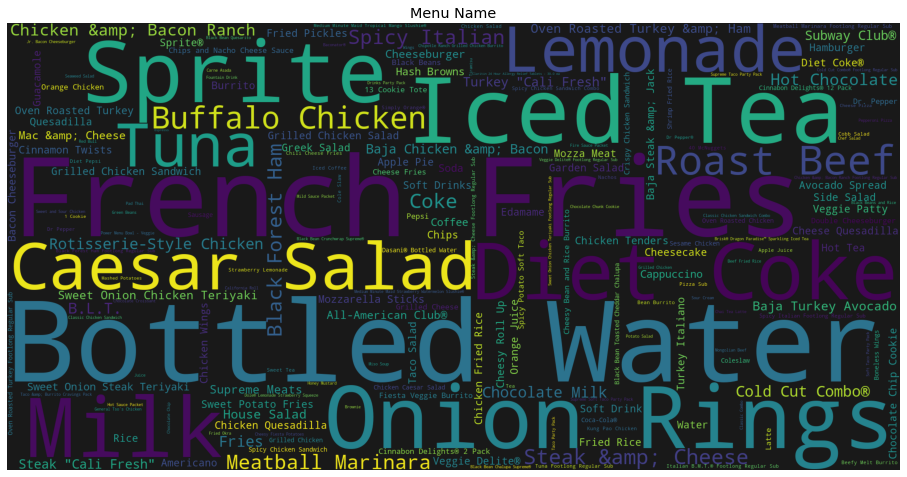

In [24]:
plt.figure(figsize=(16,10))
data = restaurants_menu['name'].value_counts().to_dict()
wc = WordCloud(width= 2000, height = 1000, random_state=1,background_color='#191919').generate_from_frequencies(data)
plt.imshow(wc)
plt.title('Menu Name')
plt.axis('off')
plt.show()

In [23]:
freefood = restaurants_menu[restaurants_menu.price == '0.0 USD']
paidfood = restaurants_menu[restaurants_menu.price != '0.0 USD']

print("Free Food : ",len(freefood))
print("Paid Food : ",len(paidfood))

Free Food :  174294
Paid Food :  4942923


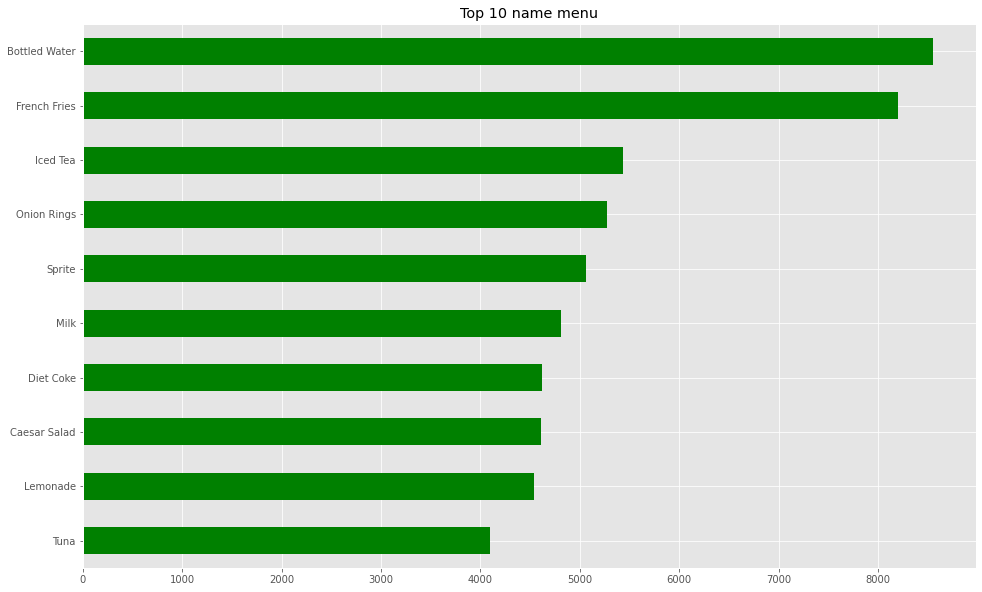

In [25]:
plt.figure(figsize=(16,10))
ax = restaurants_menu['name'].value_counts().iloc[:10].plot(kind="barh", color = 'green')
ax.invert_yaxis()
ax.title.set_text('Top 10 name menu')

In [26]:
restaurant_merge = pd.merge(restaurants, restaurants_menu, left_on='id', right_on='restaurant_id')
restaurant_merge.head()

id  position                             name_x  score  ratings  \
0   1        19  PJ Fresh (224 Daniel Payne Drive)    NaN      NaN   
1   1        19  PJ Fresh (224 Daniel Payne Drive)    NaN      NaN   
2   1        19  PJ Fresh (224 Daniel Payne Drive)    NaN      NaN   
3   1        19  PJ Fresh (224 Daniel Payne Drive)    NaN      NaN   
4   1        19  PJ Fresh (224 Daniel Payne Drive)    NaN      NaN   

                      category_x price_range  \
0  Burgers, American, Sandwiches           $   
1  Burgers, American, Sandwiches           $   
2  Burgers, American, Sandwiches           $   
3  Burgers, American, Sandwiches           $   
4  Burgers, American, Sandwiches           $   

                                    full_address zip_code        lat  \
0  224 Daniel Payne Drive, Birmingham, AL, 35207    35207  33.562365   
1  224 Daniel Payne Drive, Birmingham, AL, 35207    35207  33.562365   
2  224 Daniel Payne Drive, Birmingham, AL, 35207    35207  33.562365   
3  224 Daniel Payne Drive, Birmingham, AL, 35207    35207  33.562365   
4  224 Daniel Payne Drive, Birmingham, AL, 35207    35207  33.562365   

         lng  restaurant_id         category_y  \
0 -86.830703              1  Extra Large Pizza   
1 -86.830703              1  Extra Large Pizza   
2 -86.830703              1  Extra Large Pizza   
3 -86.830703              1  Extra Large Pizza   
4 -86.830703              1  Extra Large Pizza   

                                name_y description      price  
0              Extra Large Meat Lovers  Whole pie.  15.99 USD  
1                  Extra Large Supreme  Whole pie.  15.99 USD  
2                Extra Large Pepperoni  Whole pie.  14.99 USD  
3  Extra Large BBQ Chicken &amp; Bacon   Whole Pie  15.99 USD  
4                 Extra Large 5 Cheese  Whole pie.  14.99 USD

In [27]:
bestmenu = restaurant_merge.groupby('name_y').count().sort_values(by = 'id', ascending=False).head(20)
bestmenu

id  position  name_x  score  ratings  category_x  \
name_y                                                                          
Bottled Water              8555      8555    8555   5938     5938        8553   
French Fries               8205      8205    8205   4998     4998        8202   
Iced Tea                   5431      5431    5431   3369     3369        5425   
Onion Rings                5269      5269    5269   2779     2779        5268   
Sprite                     5060      5060    5060   2988     2988        5060   
Milk                       4815      4815    4815   3891     3891        4813   
Diet Coke                  4624      4624    4624   2764     2764        4624   
Caesar Salad               4609      4609    4609   2882     2882        4607   
Lemonade                   4540      4540    4540   2763     2763        4536   
Tuna                       4096      4096    4096   1900     1900        4096   
Roast Beef                 3964      3964    3964   1940     1940        3964   
Buffalo Chicken            3879      3879    3879   1773     1773        3879   
Steak &amp; Cheese         3855      3855    3855   1752     1752        3855   
Spicy Italian              3707      3707    3707   1655     1655        3707   
Meatball Marinara          3696      3696    3696   1649     1649        3695   
Coke                       3696      3696    3696   2077     2077        3696   
Black Forest Ham           3660      3660    3660   1634     1634        3660   
Chicken &amp; Bacon Ranch  3631      3631    3631   1635     1635        3631   
Hot Chocolate              3596      3596    3596   2502     2502        3593   
Rotisserie-Style Chicken   3590      3590    3590   1634     1634        3590   

                           price_range  full_address  zip_code   lat   lng  \
name_y                                                                       
Bottled Water                     7409          8499      8499  8555  8555   
French Fries                      6961          8148      8148  8205  8205   
Iced Tea                          4901          5416      5416  5431  5431   
Onion Rings                       4514          5232      5232  5269  5269   
Sprite                            4096          5016      5016  5060  5060   
Milk                              4486          4793      4793  4815  4815   
Diet Coke                         3868          4589      4589  4624  4624   
Caesar Salad                      3897          4584      4584  4609  4609   
Lemonade                          3917          4489      4489  4540  4540   
Tuna                              4010          4080      4080  4096  4096   
Roast Beef                        3921          3949      3949  3964  3964   
Buffalo Chicken                   3803          3872      3872  3879  3879   
Steak &amp; Cheese                3825          3842      3842  3855  3855   
Spicy Italian                     3697          3695      3695  3707  3707   
Meatball Marinara                 3682          3684      3684  3696  3696   
Coke                              2898          3656      3656  3696  3696   
Black Forest Ham                  3648          3647      3647  3660  3660   
Chicken &amp; Bacon Ranch         3622          3619      3619  3631  3631   
Hot Chocolate                     3131          3587      3587  3596  3596   
Rotisserie-Style Chicken          3581          3577      3577  3590  3590   

                           restaurant_id  category_y  description  price  
name_y                                                                    
Bottled Water                       8555        8555         1957   8555  
French Fries                        8205        8205         2712   8205  
Iced Tea                            5431        5431         2132   5431  
Onion Rings                         5269        5269         2151   5269  
Sprite                              5060        5060         1063   5060  
Milk

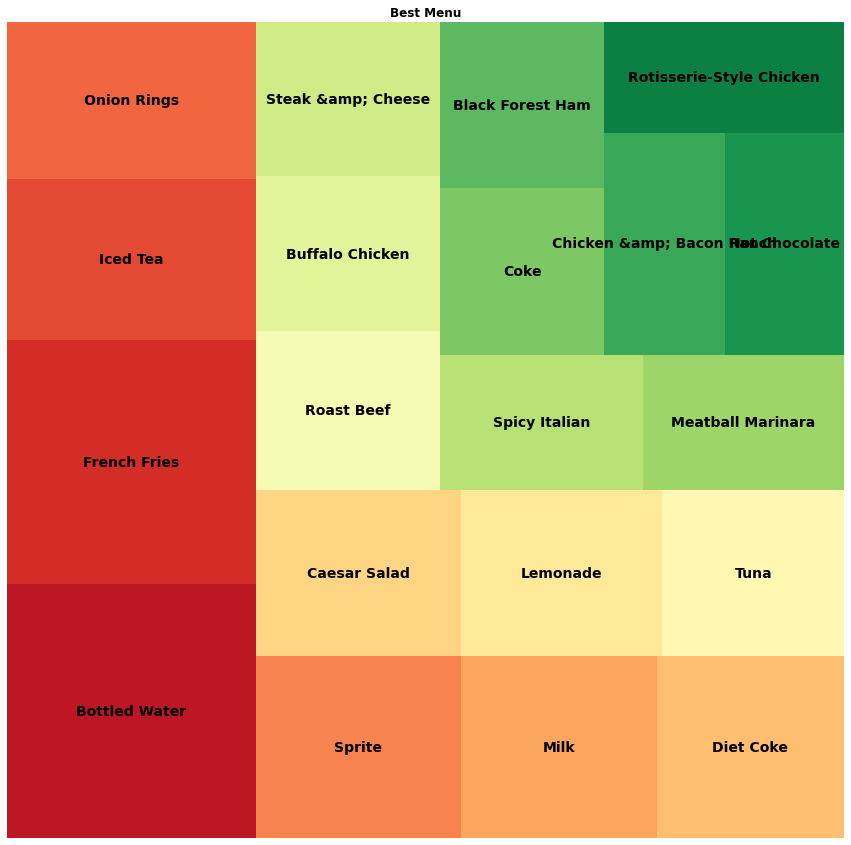

In [28]:
from matplotlib import gridspec

import squarify

y = bestmenu
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.id, label = y.index, color=sns.color_palette("RdYlGn", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Best Menu', position=(0.5, 1.0+0.03), fontsize = 12, fontweight='bold')
plt.axis('off')
plt.show()

In [29]:
restaurants.price_range.unique()

array(['$', nan, '$$', '$$$', '$$$$', '$$$$$$$$$$$$$$$$$'], dtype=object)

In [31]:
plt.figure(figsize=(10,6))
print('$ = Inexpensive:',len(restaurants[restaurants.price_range == '$']))
print('$$ = Moderately Expensive:',len(restaurants[restaurants.price_range == '$$']))
print('$$$ = Expensive:',len(restaurants[restaurants.price_range == '$$$']))
print('$$$$ = Very Expensive:',len(restaurants[restaurants.price_range == '$$$$']))

$ = Inexpensive: 37637
$$ = Moderately Expensive: 14952
$$$ = Expensive: 237
$$$$ = Very Expensive: 25


<Figure size 720x432 with 0 Axes>

In [32]:
fig = px.pie(restaurants, names='price_range',title='Population of Price Range in Menus', template = 'plotly_dark')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=14, uniformtext_mode='hide',showlegend=True)

def newLegend(fig, newNames):
    for item in newNames:
        for i, elem in enumerate(fig.data[0].labels):
            if elem == item:
                fig.data[0].labels[i] = newNames[item]
    return(fig)

fig = newLegend(fig = fig, newNames = {'$':'Inexpensive',
                                       '$$' : 'Moderately Expensive',
                                      '$$$' : 'Expensive',
                                      '$$$$' : 'Very Expensive'})


fig.show()

In [33]:
popular_restaurant = restaurants.sort_values(['score','ratings'], ascending=False)
popular_restaurant.head()

id  position                                 name  score  ratings  \
18401  18402        68  Starbucks (S. Van Dorn and Pickett)    5.0    223.0   
28607  28608       169                            Sundevich    5.0    176.0   
23134  23135        35                  Berries &amp; Bowls    5.0    156.0   
22901  22902        15        Starbucks (South Riding Blvd)    5.0    137.0   
19926  19927        86                  Open Road (ROSSLYN)    5.0    136.0   

                                                category price_range  \
18401  Cafe, Coffee &amp; Tea, Breakfast and Brunch, ...           $   
28607             Salads, American, Vegetarian, Sandwich         NaN   
23134           Juice and Smoothies, Healthy, Vegetarian           $   
22901  Cafe, Coffee &amp; Tea, Breakfast and Brunch, ...           $   
19926                      Burgers, American, Sandwiches           $   

                                            full_address zip_code        lat  \
18401                5782 Dow Ave, Alexandria, VA, 22304    22304  38.804558   
28607      601 New Jersey Ave. NW, Washington, DC, 20001    20001  38.897830   
23134             120 Market St, Gaithersburg, MD, 20878    20878  39.122270   
22901  43114 Peacock Market #140, South Riding, VA, 2...    20152  38.915668   
19926        1201 Wilson Boulevard, Arlington, VA, 22209    22209  38.895720   

             lng  
18401 -77.132929  
28607 -77.011590  
23134 -77.234758  
22901 -77.511693  
19926 -77.071040

In [34]:
popular_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63469 entries, 18401 to 63468
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            63469 non-null  int64  
 1   position      63469 non-null  int64  
 2   name          63469 non-null  object 
 3   score         35302 non-null  float64
 4   ratings       35302 non-null  float64
 5   category      63384 non-null  object 
 6   price_range   52852 non-null  object 
 7   full_address  63016 non-null  object 
 8   zip_code      62953 non-null  object 
 9   lat           63469 non-null  float64
 10  lng           63469 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 5.8+ MB


In [35]:
fig = px.scatter(popular_restaurant, x="score", y="ratings",
     size_max=45, log_x=True, template='plotly_dark')

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.show()

In [38]:
restaurants.score.unique()

array([nan, 4.7, 4.6, 5. , 4.9, 3.7, 4.8, 4.3, 4.4, 4.1, 4.5, 4.2, 4. ,
       3.8, 3.9, 3.5, 3.2, 3.6, 3. , 3.4, 3.3, 3.1, 2.2, 2.7, 2.9, 2.4,
       2.8, 2.6, 2.5, 2.1, 1.9, 2. , 2.3, 1.3])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


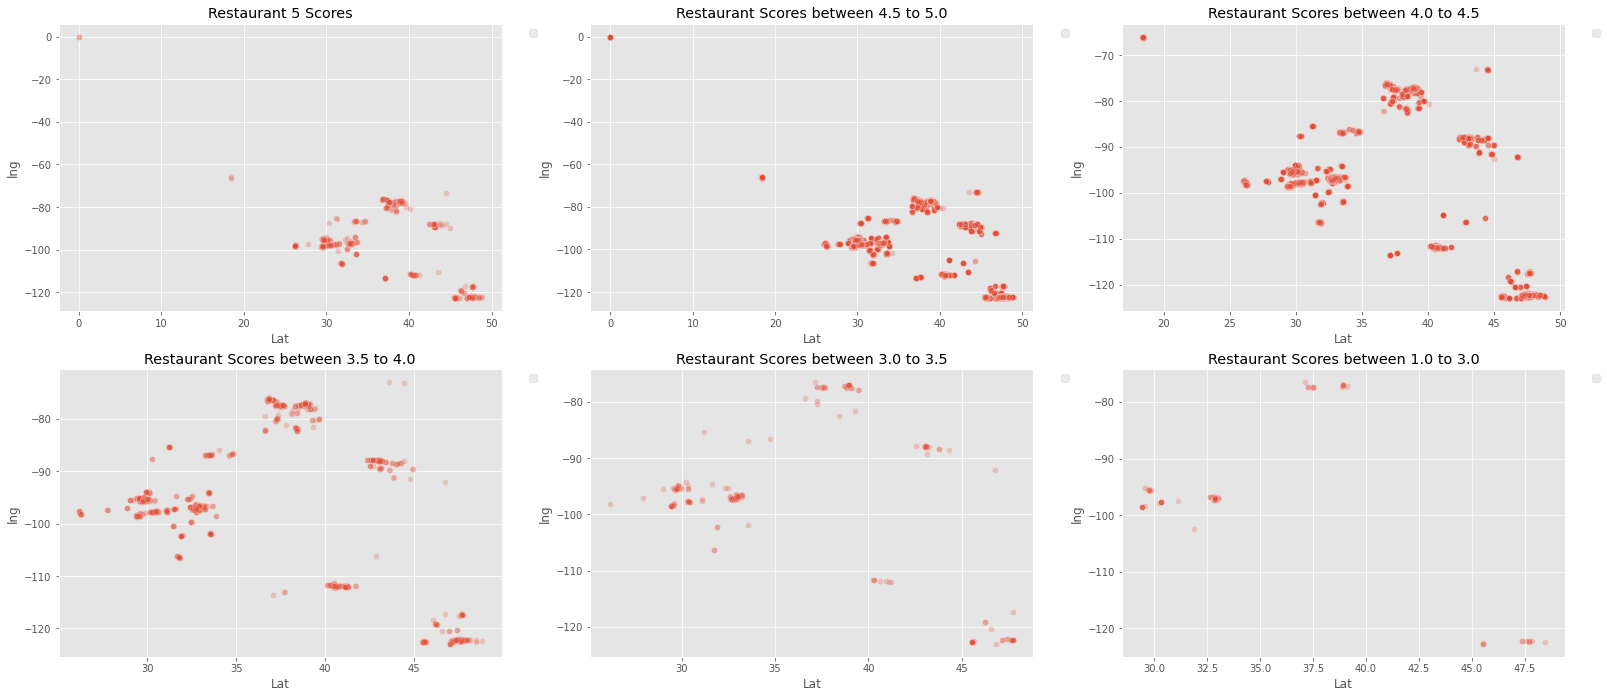

In [39]:
fig = plt.figure(figsize=(27,18))

sub1 = fig.add_subplot(3,3,1)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant 5 Scores')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[popular_restaurant.score == 5.0], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,2)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 4.5 to 5.0')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 4.5) & (popular_restaurant.score < 5.0)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,3)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 4.0 to 4.5')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 4.0) & (popular_restaurant.score < 4.5)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,4)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 3.5 to 4.0')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 3.5) & (popular_restaurant.score < 4.0)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,5)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 3.0 to 3.5')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 3.0) & (popular_restaurant.score < 3.5)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

sub1 = fig.add_subplot(3,3,6)
sub1.set_xlabel('Lat')
sub1.set_title('Restaurant Scores between 1.0 to 3.0')
sns.scatterplot(x='lat',y='lng', data=popular_restaurant[ (popular_restaurant.score >= 1.0) & (popular_restaurant.score < 3.0)], alpha=0.25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [40]:
df_new = popular_restaurant.dropna()


In [41]:
df_new = df_new[(df_new.lat.notnull())]
df_new = df_new[(df_new.lat != -1) & (df_new.lng != -1)]
df_new = df_new[~df_new.lat.isna()]

In [42]:
places = []

map_offenses = folium.Map(location=[37.09024,-95.712891], zoom_start=4.3)
for i, loc in df_new.iterrows():
    places.append((loc['lat'], loc['lng']))

In [43]:
map_offenses.add_children(plugins.HeatMap(places, radius=18))
